In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
os.chdir('../')
sys.path.append('./')
os.getcwd()
from eval import PaintedDateSet
from torchvision import transforms, datasets
import torchvision.transforms.functional as TF

In [2]:
dataset_name = 'mnist'
# dataset_name = 'cifar10'
# dataset_name = 'fashionmnist'
rotation = 0
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: TF.rotate(x, rotation))])
if dataset_name == 'mnist':
    original_dataset = datasets.MNIST(root='../dataset', train=False, download=False, transform=transform)
elif dataset_name == 'cifar10':
    original_dataset = datasets.CIFAR10(root='../dataset', train=False, download=False, transform=transform)
elif dataset_name == 'fashionmnist':
    original_dataset = datasets.FashionMNIST(root='../dataset', train=True, download=False, transform=transform)
else:
    raise ValueError('Unknown dataset name')

In [3]:
def show_image(plt, img, title = None):
    cmap = 'gray' if img.shape[0] == 1 else None
    plt.imshow(img.permute(1,2,0), cmap=cmap)
    plt.axis('off')
    plt.title.set_text(title)

def plot_painted_or_original(painted_dataset, original_dataset, num_samples_plot = 2):
    for f_idx, idx in enumerate(np.random.choice(len(painted_dataset), num_samples_plot, replace=False)):
        f = plt.figure(f_idx, figsize=(10, 5))
        f1 = f.add_subplot(1, 2, 1)
        show_image(f1, original_dataset[idx][0], title = 'original')
        f2 = f.add_subplot(1, 2, 2)
        show_image(f2, painted_dataset[idx][0], title = 'painted')
        if not os.path.exists('./demo/painted_visualization'):
            os.makedirs('./demo/painted_visualization')
        f.savefig('./demo/painted_visualization/'+ 'paint_' + dataset_name + '_' +str(idx) + '.pdf', pad_inches=0, bbox_inches='tight')
        plt.show()
        
def plot_painted_or_original(painted_dataset, original_dataset, num_samples_plot = 2):
    for f_idx, idx in enumerate(np.random.choice(len(painted_dataset), num_samples_plot, replace=False)):
        plt.figure(figsize=(6,5))
        show_image(plt.gca(), original_dataset[9788][0], title = 'original')
        plt.savefig('./demo/painted_visualization/'+ 'original_' + dataset_name + '_' +str(9788) + '.pdf', pad_inches=0, bbox_inches='tight')
        plt.figure(figsize=(6,5))
        show_image(plt.gca(), painted_dataset[9788][0], title = 'painted')
        if not os.path.exists('./demo/painted_visualization'):
            os.makedirs('./demo/painted_visualization')
        plt.savefig('./demo/painted_visualization/'+ 'paint_' + dataset_name + '_' +str(9788) + '.pdf', pad_inches=0, bbox_inches='tight')
        plt.show()
        

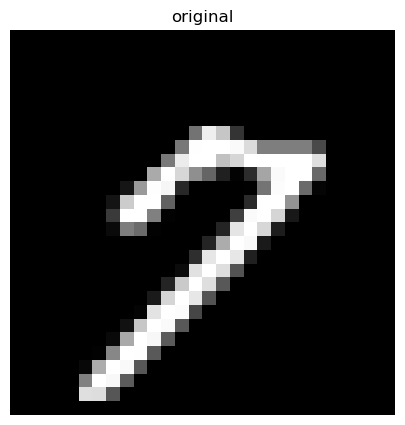

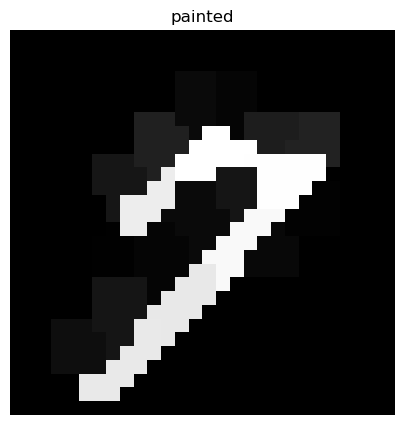

In [4]:
painted_dataset = PaintedDateSet(dataset_name, rotation)
plot_painted_or_original(painted_dataset, original_dataset, 1)